# The Spark Foundation

## Task 2 - Prediction using unsupervised ML

## By - Projeet Ghosh

In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the data
data = pd.read_csv('Iris.csv')

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.shape

(150, 6)

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [58]:
# Checking missing values if any--
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
Cluster_id       False
dtype: bool

# EDA

In [ ]:
# Scatterplot
sns.scatterplot(x = data['SepalLengthCm'], y = data['SepalWidthCm'], data = data, hue = data['Species'])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

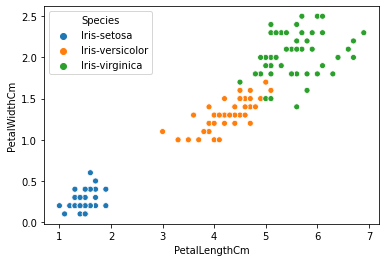

In [9]:
# Scatterplot
sns.scatterplot(x = data['PetalLengthCm'], y = data['PetalWidthCm'], data = data, hue = data['Species'])

### We can see that Petal length and width are able to form better cluster of iris species

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

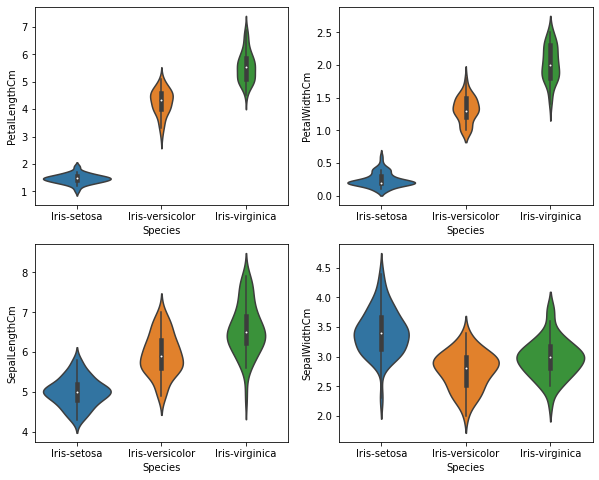

In [19]:
# Violinplot
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.violinplot(x = data['Species'], y = data['PetalLengthCm'], data = data)
plt.subplot(2,2,2)
sns.violinplot(x = data['Species'], y = data['PetalWidthCm'], data = data)
plt.subplot(2,2,3)
sns.violinplot(x = data['Species'], y = data['SepalLengthCm'], data = data)
plt.subplot(2,2,4)
sns.violinplot(x = data['Species'], y = data['SepalWidthCm'], data = data)

### We can observe that Iris-setosa has the most different features compared to the other two species

# Clustering

In [20]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


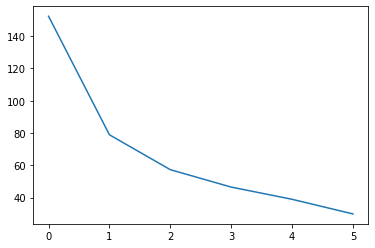

In [30]:
from sklearn.cluster import KMeans
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=40)
    kmeans.fit(data.iloc[:,1:5])
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### From the above elbow curve we can see that 3 is the optimal number of clusters that can be formed

In [29]:
from sklearn.metrics import silhouette_score
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data.iloc[:,1:5])
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data.iloc[:,1:5], cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6808136202936816
For n_clusters=3, the silhouette score is 0.5525919445499757
For n_clusters=4, the silhouette score is 0.4978256901095472
For n_clusters=5, the silhouette score is 0.4885175508886279
For n_clusters=6, the silhouette score is 0.36815026092830333
For n_clusters=7, the silhouette score is 0.3559677254550641
For n_clusters=8, the silhouette score is 0.3470107460076511


### We can see that the optimal number of clusters to be formed by silhouette score is 2

In [27]:
data.iloc[:,1:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### From the above two test we have chosen the optimal number of clusters to be 3.

# K-Means Clustering

In [31]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(data.iloc[:,1:5])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
data['Cluster_id'] = kmeans.labels_

<AxesSubplot:>

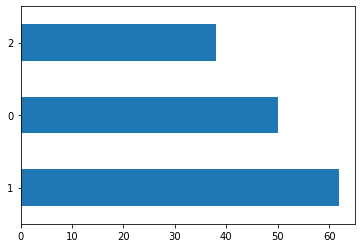

In [41]:
data['Cluster_id'].value_counts().plot.barh()

<AxesSubplot:xlabel='Cluster_id'>

<Figure size 576x720 with 0 Axes>

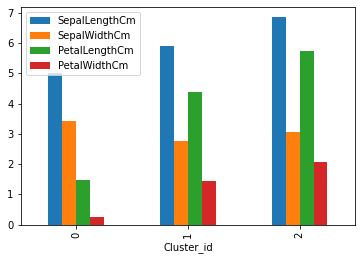

In [53]:
# Barplot of all three clusters on the basis of 'gdpp', 'child_mort' and 'income'
plt.figure(figsize=(8,10))
data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].groupby(data['Cluster_id']).mean().plot(kind = 'bar')

### We can see that 'PetalLengthCm' and 'PetalWidthCm' are able to descibe the cluster better than any other feature

# Cluster Profiling 

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

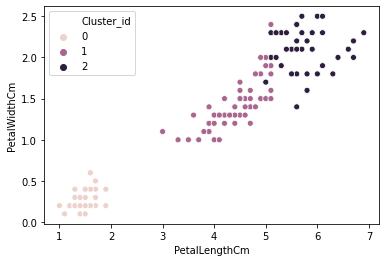

In [54]:
sns.scatterplot(x = data['PetalLengthCm'], y = data['PetalWidthCm'], data = data, hue = data['Cluster_id'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

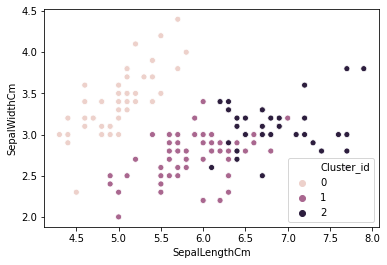

In [55]:
sns.scatterplot(x = data['SepalLengthCm'], y = data['SepalWidthCm'], data = data, hue = data['Cluster_id'])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

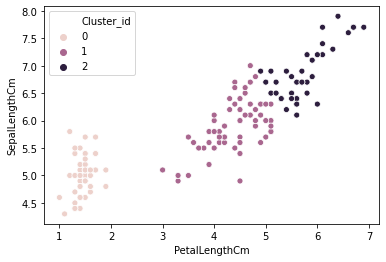

In [56]:
sns.scatterplot(x = data['PetalLengthCm'], y = data['SepalLengthCm'], data = data, hue = data['Cluster_id'])

<AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>

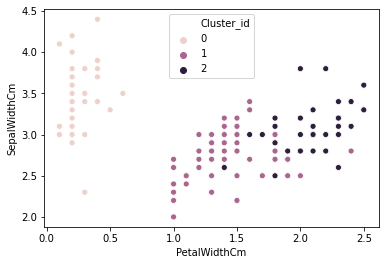

In [57]:
sns.scatterplot(x = data['PetalWidthCm'], y = data['SepalWidthCm'], data = data, hue = data['Cluster_id'])

### After doing the cluster profiling we can see 3 different clusters clearly 

# Conclusion

### It can be observed that 'Petal' dimensions are better features to create cluster than 'Sepal' dimensions. After performing k-means clustering we got 3 as the optimal number of clusters